# CASE STUDY: SUBSCRIPTION PRODUCTS
# Brilliant

# STEP #1 IMPORTING LIBRARIES AND DATA

In [47]:
# Importing Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [48]:
# Importing Data
dataset = pd.read_csv('data/new_churn_data.csv')

## Data Preprocessing

In [49]:
#Data preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

## One Hot Encoding

In [50]:
dataset.housing.value_counts()

R     9221
na    7910
O     1834
Name: housing, dtype: int64

In [51]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [52]:
dataset = pd.get_dummies(dataset)

In [53]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [54]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [55]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [56]:
# Balancing the Training Set
y_train.value_counts()

0    8934
1    6238
Name: churn, dtype: int64

In [57]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [58]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [59]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [60]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [62]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [63]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [64]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [65]:
X_train = X_train2
X_test = X_test2

In [66]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
12462,-1.274974,-0.408111,-0.323655,-0.490975,-0.408200,-0.184885,-1.131557,-0.076875,-0.098748,-0.698915,...,-0.325771,-0.160680,-0.295513,-0.3162,3.475280,-0.292294,-0.282322,-0.296154,-0.295513,-0.316966
11435,0.492423,-0.408111,-0.323655,-0.711682,-0.408200,3.615162,1.633662,1.251502,-0.098748,1.212789,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,-0.292294,-0.282322,-0.296154,-0.295513,-0.316966
14021,-0.651187,-0.408111,-0.323655,-0.711682,-0.408200,-0.184885,0.346212,-0.076875,-0.098748,-0.469511,...,-0.325771,-0.160680,-0.295513,-0.3162,3.475280,-0.292294,-0.282322,-0.296154,-0.295513,-0.316966
18149,-0.651187,-0.408111,-0.323655,-0.711682,-0.408200,-0.184885,0.234260,-0.076875,-0.098748,-0.469511,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,-0.292294,-0.282322,3.376624,-0.295513,-0.316966
12266,1.116210,-0.408111,-0.323655,-0.513045,-0.408200,-0.184885,-0.840481,-0.076875,-0.098748,-0.393042,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,-0.292294,-0.282322,-0.296154,-0.295513,-0.316966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,-0.235329,5.232936,0.534198,0.899481,5.356098,-0.184885,1.779199,-0.076875,-0.098748,1.901002,...,-0.325771,6.223543,-0.295513,-0.3162,-0.287747,-0.292294,-0.282322,-0.296154,-0.295513,-0.316966
3200,-0.339293,-0.408111,-0.323655,-0.270267,-0.408200,-0.184885,-0.650162,-0.076875,-0.098748,-0.316574,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,3.421211,-0.282322,-0.296154,-0.295513,-0.316966
9842,1.428104,-0.111213,2.249904,-0.557187,-0.104816,-0.184885,-1.176338,-0.076875,-0.098748,-0.698915,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,3.421211,-0.282322,-0.296154,-0.295513,-0.316966
13669,-1.171009,-0.408111,-0.323655,-0.027489,-0.408200,-0.184885,-0.515820,-0.076875,-0.098748,-0.545979,...,-0.325771,-0.160680,-0.295513,-0.3162,-0.287747,-0.292294,-0.282322,3.376624,-0.295513,-0.316966


# STEP #2 MODEL BUILDING

In [67]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [68]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [69]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [70]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6361718955971527

In [71]:
precision_score(y_test, y_pred)

0.5420054200542005

In [72]:
recall_score(y_test, y_pred) 

0.7662835249042146

In [73]:
f1_score(y_test, y_pred)

0.6349206349206348

Test Data Accuracy: 0.6362


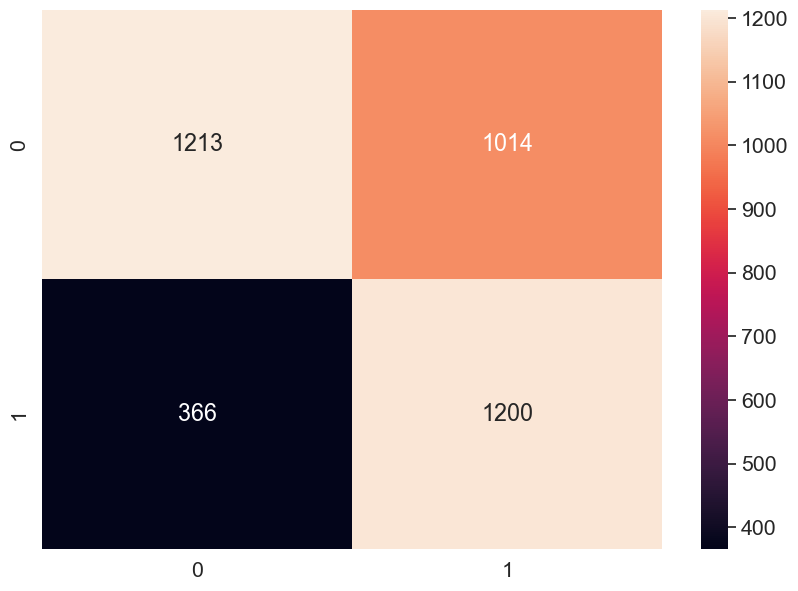

In [74]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [75]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.663 (+/- 0.025)


In [76]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.201519
1,deposits,0.063263
2,withdrawal,0.034039
3,purchases_partners,-0.774072
4,purchases,-0.219370
5,cc_taken,0.055559
6,cc_recommended,-0.033299
7,cc_disliked,0.007185
8,cc_liked,0.008380
9,cc_application_begin,0.051029


# STEP #3 FEATURE SELECTION

In [77]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [81]:
# Model to Test
classifier = LogisticRegression()

In [83]:
# Select Best X Features
rfe = RFE(estimator=classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [85]:
# summarize the selection of the attributes
print(rfe.support_)

[ True  True False  True  True  True False False False False  True  True
  True  True  True False  True  True  True False  True  True  True  True
 False False False False  True False False False  True False False False
  True False False False False]


In [88]:
print(rfe.ranking_)

[ 1  1  7  1  1  1 10 18 17  2  1  1  1  1  1 11  1  1  1 19  1  1  1  1
 12  3  6  5  1  9  4 21  1 20 22 16  1 15  8 13 14]


/var/folders/zp/c3176_5j7jd988h2xj_1046w0000gn/T/ipykernel_24017/1049058464.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

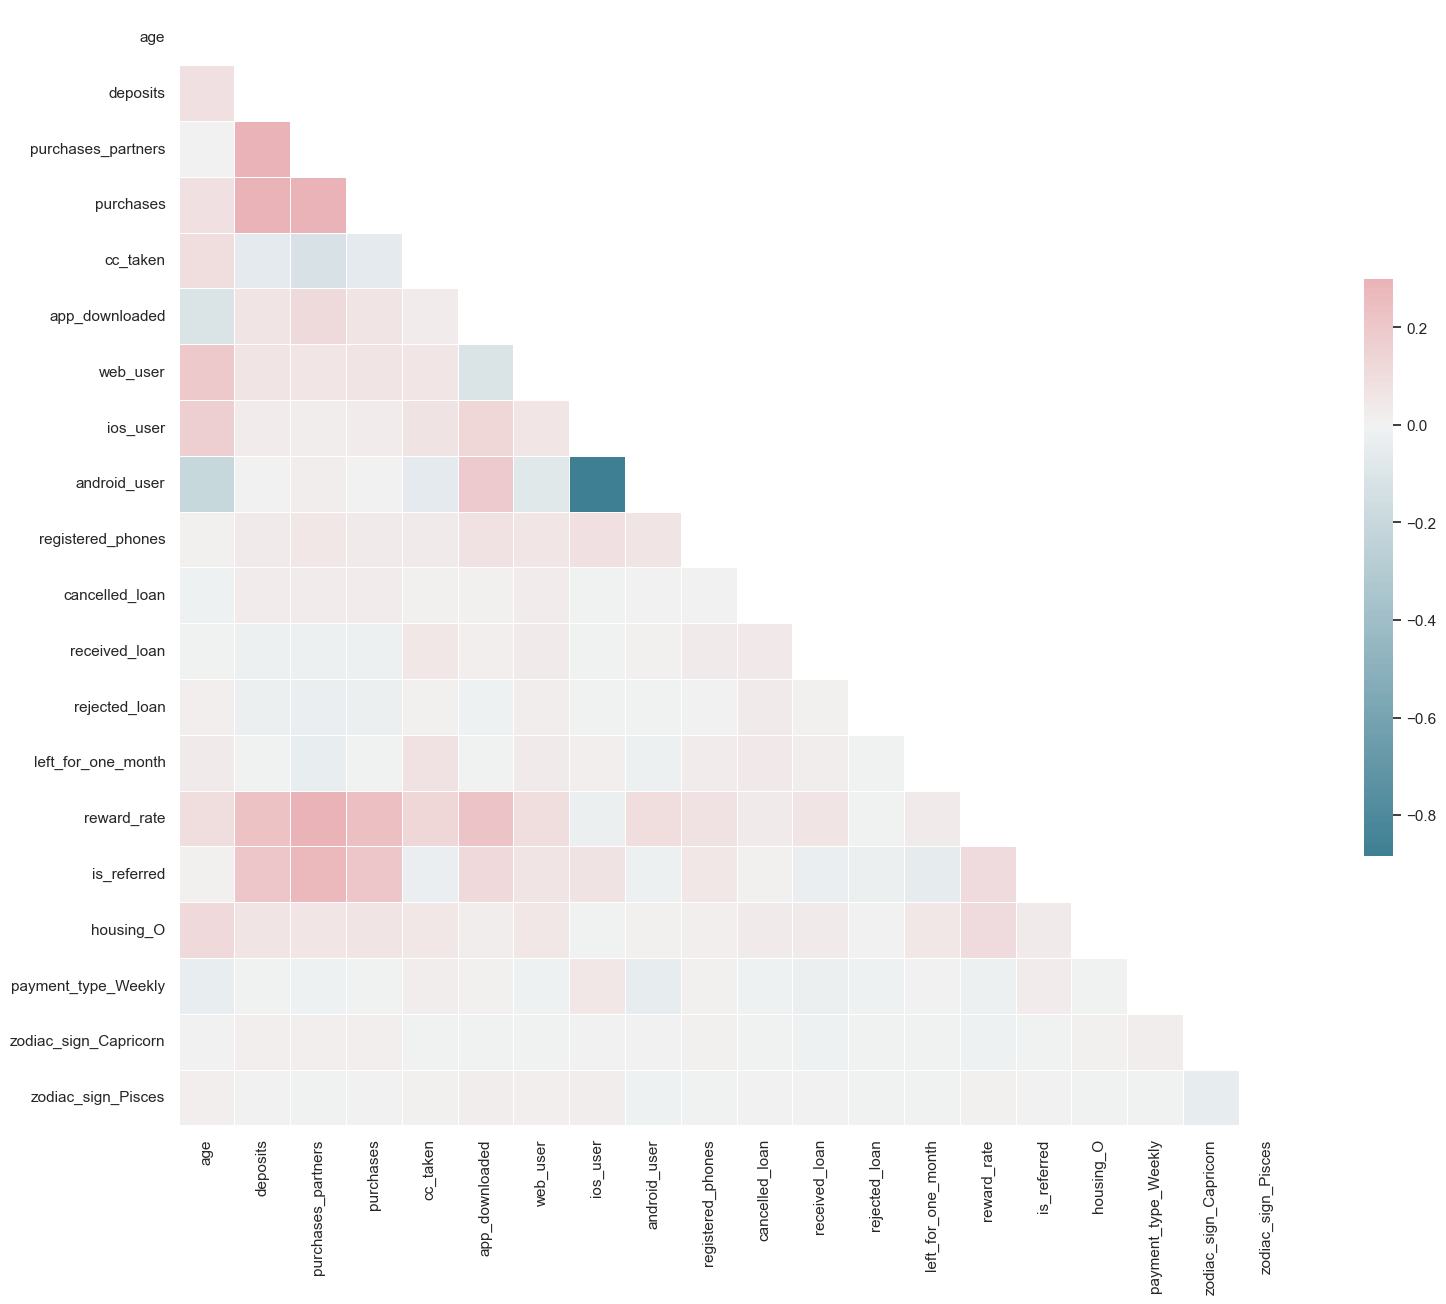

In [94]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [95]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression()

/var/folders/zp/c3176_5j7jd988h2xj_1046w0000gn/T/ipykernel_24017/2680435651.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


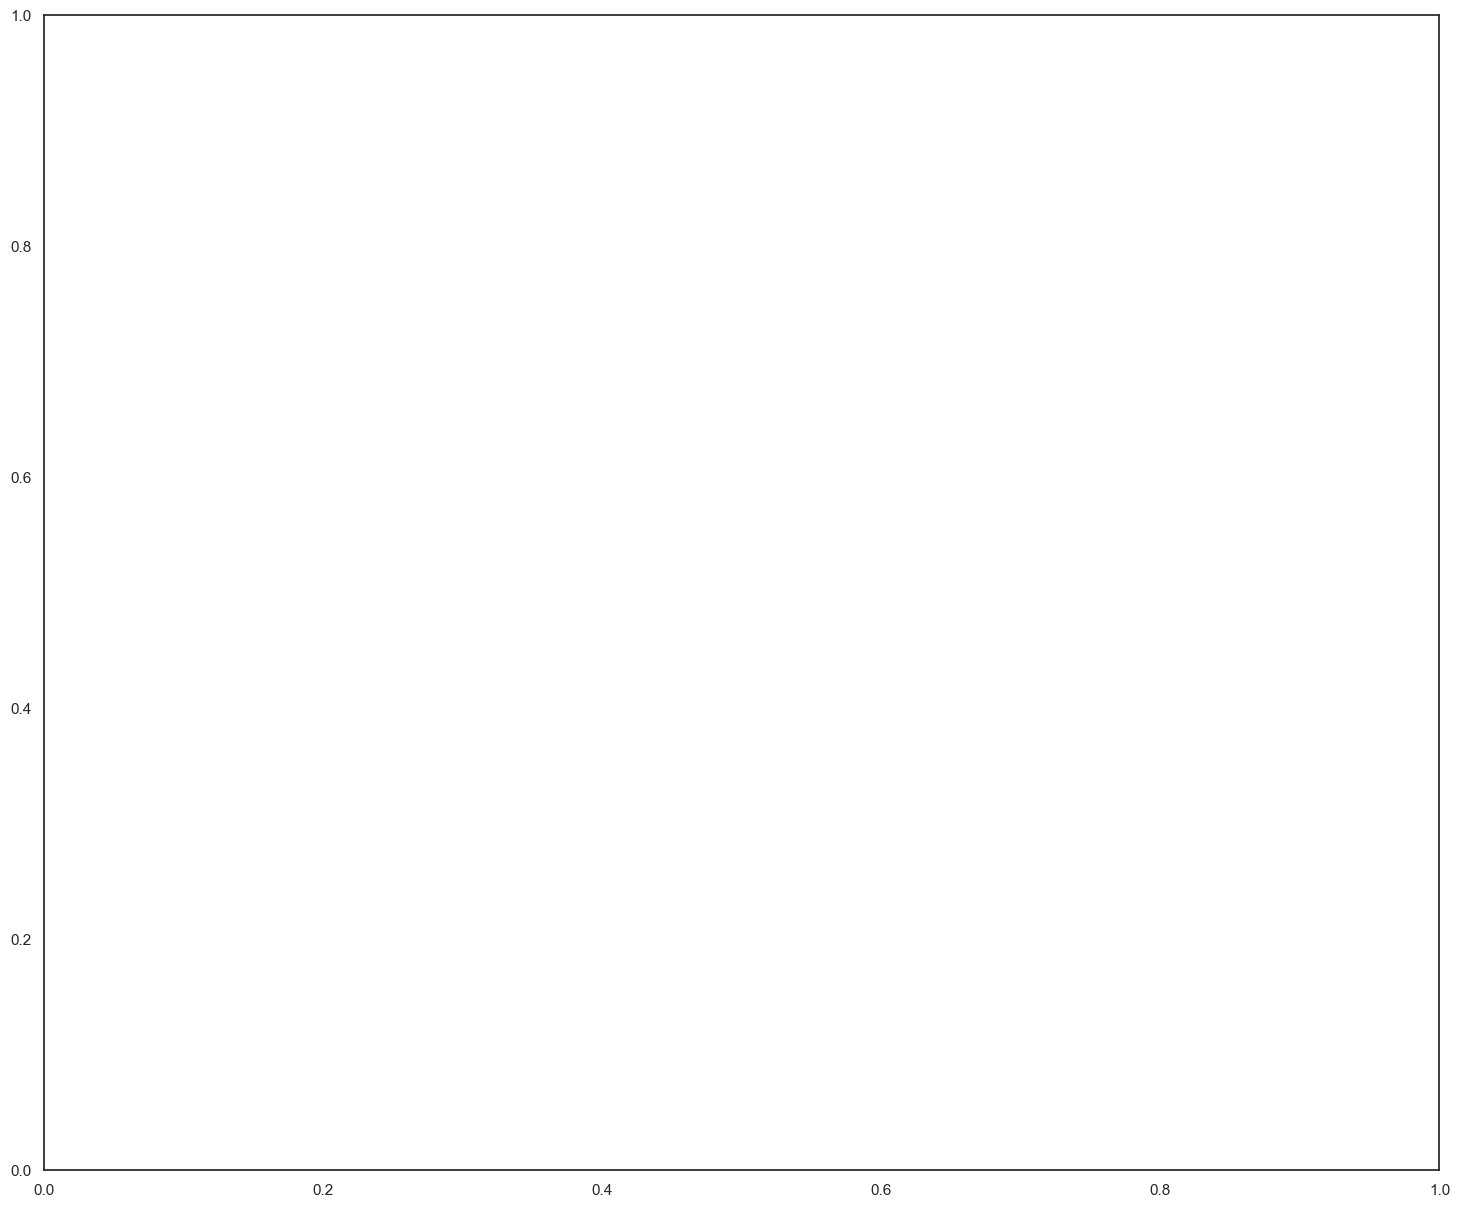